# Ayudantía 4: Laboratorio 2 Parte 1

4 septiembre 2025

diego.herrerag00@uc.cl

Descripción del problema
En este laboratorio utilizará un conjunto de datos que recopila información sobre hoteles internacionales,
usuarios que realizaron reservas y rese˜nas que describen su experiencia durante la estadía. Estos datos están
divididos en tres archivos:
• hotels.csv: cada fila describe un hotel, incluyendo atributos como ubicaci´on geográfica, categoría, y
puntajes de referencia o “base” en distintas dimensiones (ej. limpieza, comodidad, ubicación, etc.).
• users.csv: cada fila corresponde a un usuario de la plataforma, con información demogr´afica y de
contexto relevante para caracterizar su comportamiento de rese˜na.
• reviews.csv: cada fila representa una rese˜na realizada por un usuario sobre un hotel en una fecha
determinada.
En base a los campos recién descritos y utilizando las librerías presentadas en clases, deberá responder una
serie de preguntas relacionadas con el an´alisis de datos tabulares en Python.

In [50]:
# Primero que todo, abrimos los archivos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_hoteles = pd.read_csv("hotels.csv")
df_usuarios = pd.read_csv("users.csv")
df_reviews = pd.read_csv("reviews.csv")

In [51]:
df_hoteles.head(7)

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,NaN,5,40.75800,-73.985500,9.1,8.8,8.9,9.5,8.6,8.0
1,2,The Royal Compass,London,United Kingdom,5,51.50720,-0.127600,9.0,9.2,8.8,9.4,9.0,7.9
2,3,L'Étoile Palace,Paris,France,9,100.00000,2.352200,8.8,9.4,8.7,9.6,13.0,8.1
3,4,Kyo-to Grand,Tokyo,Japan,5,35.68950,139.691700,9.6,9.0,9.3,8.5,9.5,8.2
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.27690,55.296200,9.3,9.5,9.6,8.9,9.4,8.5
5,6,Marina Bay Zenith,Singapore,Singapore,5,1.29027,103.851959,9.2,9.1,9.4,9.7,9.1,8.3
6,7,Sydney Harbour Grand,Sydney,Australia,5,-33.86510,151.209900,8.9,-2.0,8.5,9.8,8.9,8.4


In [52]:
df_usuarios.head(7)

,user_id,user_gender,country,age_group,traveller_type,join_date
0,1,Female,United Kingdom,35-44,Solo,2024-09-29
1,2,Male,United Kingdom,25-34,Solo,2023-11-29
2,3,Female,Mexico,25-34,Family,2022-04-03
3,4,Male,India,35-44,Family,2023-12-02
4,5,Other,Japan,25-34,Solo,2021-12-18
5,6,Male,Brazil,25-34,Couple,2025-06-27
6,7,Male,United Kingdom,25-34,Business,2022-07-13


In [53]:
df_reviews.head(7)

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,1,1600,1,2022-10-07,8.7,14.0,8.7,8.5,9.0,8.8,NaN,Practice reduce young our because machine. Rec...
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,8.6,Test cover traditional black. Process tell Mr ...
2,3,186,18,2023-12-18,8.8,9.7,8.8,-3.0,8.7,8.1,8.6,Friend million student social study yeah. Grow...
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,8.3,Huge girl already remain truth behind card. Ap...
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,8.9,Cover feeling call community serve television ...
5,6,800,7,2025-08-10,8.7,8.2,8.7,8.1,9.5,9.0,8.8,Truth forget computer current bad billion lead...
6,7,830,23,2022-06-05,8.9,8.1,9.0,8.6,9.6,9.2,8.2,School hour matter. Anyone discover local he t...


In [54]:
# A simple vista se ven valores nulos, antes de limpiarlos procedemos a confirmar su existencia
df_hoteles.isnull().sum()

hotel_id                0
hotel_name              0
city                    1
country                 1
star_rating             0
lat                     1
lon                     1
cleanliness_base        1
comfort_base            1
facilities_base         1
location_base           1
staff_base              0
value_for_money_base    1
dtype: int64

In [55]:
# A simple vista se ven valores nulos, antes de limpiarlos procedemos a confirmar su existencia
df_usuarios.isnull().sum()

user_id             0
user_gender         0
country           100
age_group           0
traveller_type     99
join_date          97
dtype: int64

In [56]:
# A simple vista se ven valores nulos, antes de limpiarlos procedemos a confirmar su existencia
df_reviews.isnull().sum()

review_id                   0
user_id                     0
hotel_id                    0
review_date              1216
score_overall            2422
score_cleanliness        2422
score_comfort            2422
score_facilities         2427
score_location           2435
score_staff              2416
score_value_for_money    2427
review_text               824
dtype: int64

In [57]:
#Podeos notar que el data frame de las reviews tiene muchisimos valores nulos, sin embargo esto podría deberse por poseer 
# muchisimos datos. Para ver cuantos datos posee, usamos ".size":

df_reviews.size

600000

Dado que todos tienen muchos datos, no es necesario "preocuparnos". Procedemos a la limpieza:

In [58]:
df_hoteles = df_hoteles.dropna()
df_usuarios = df_usuarios.dropna()
df_reviews = df_reviews.dropna()  

In [59]:
df_hoteles.isnull().sum()

hotel_id                0
hotel_name              0
city                    0
country                 0
star_rating             0
lat                     0
lon                     0
cleanliness_base        0
comfort_base            0
facilities_base         0
location_base           0
staff_base              0
value_for_money_base    0
dtype: int64

In [60]:
df_usuarios.isnull().sum()

user_id           0
user_gender       0
country           0
age_group         0
traveller_type    0
join_date         0
dtype: int64

In [61]:
df_reviews.isnull().sum()

review_id                0
user_id                  0
hotel_id                 0
review_date              0
score_overall            0
score_cleanliness        0
score_comfort            0
score_facilities         0
score_location           0
score_staff              0
score_value_for_money    0
review_text              0
dtype: int64

### a) Analice y describa la relación entre el puntaje global entregado por los usuarios y los sub-puntajes de las distintas dimensiones de la reseña, es decir, cómo se calcula. Evalúe en qué medida ambos son consistentes y comente posibles discrepancias.

In [62]:
# Veamos nuevamente las columnas para verificar cuales son las de "score" correspondientes a los calculos
df_reviews.columns

Index(['review_id', 'user_id', 'hotel_id', 'review_date', 'score_overall',
       'score_cleanliness', 'score_comfort', 'score_facilities',
       'score_location', 'score_staff', 'score_value_for_money',
       'review_text'],
      dtype='object')

In [63]:
def calculo(fila):
    puntaje = (fila["score_cleanliness"] + fila["score_comfort"] + fila["score_facilities"] + fila["score_location"] + fila["score_staff"] + fila["score_value_for_money"]) / 5
    puntaje = float(puntaje)
    return list(range(int(puntaje)-1,int(puntaje)+2))

In [64]:
df_reviews.apply(calculo, axis=1)

1         [9, 10, 11]
2           [7, 8, 9]
3         [9, 10, 11]
4         [9, 10, 11]
5         [9, 10, 11]
             ...     
49993       [7, 8, 9]
49994     [9, 10, 11]
49995      [8, 9, 10]
49996     [9, 10, 11]
49999    [10, 11, 12]
Length: 33924, dtype: object

Para ver como están calculado el overall score a partir de los demás tipos de score una forma rápida seía suponer que el overall corresponde al promedio ponderado de los demás score. Verifiquemos si es cierto. 

In [65]:
# Supongamos que el score_overall es el puntaje ponderado
def calculo_puntaje(fila, rango):
    puntaje = (fila["score_cleanliness"] + fila["score_comfort"] + fila["score_facilities"] + fila["score_location"] + fila["score_staff"] + fila["score_value_for_money"]) / 5
    if abs(fila["score_overall"] - puntaje) <= rango:
        return True
    else:
        return False

In [66]:
contador_true = 0
contador_false = 0
rango = 0.5 
for _, fila in df_reviews.iterrows():
    if calculo_puntaje(fila, rango):
        contador_true += 1
    else:
        contador_false += 1
print(f"True: {contador_true}")
print(f"False: {contador_false}")

True: 450
False: 33474


Claramente el puntaje no es el promedio ponderado. Probemos entonces con el Promedio Aritmetico.

In [67]:
# Supongamos que el score_overall es el puntaje ponderado
def calculo_puntaje(fila, rango):
    puntaje = (fila["score_cleanliness"]* 0.2 + fila["score_comfort"]* 0.1 + fila["score_facilities"]*0.15 + fila["score_location"]*0.2 + fila["score_staff"]*0.2 + fila["score_value_for_money"]*0.15) / 5
    if abs(fila["score_overall"] - puntaje) <= rango:
        return True
    else:
        return False

In [68]:
contador_true = 0
contador_false = 0
rango = 0.5 
for _, fila in df_reviews.iterrows():
    if calculo_puntaje(fila, rango):
        contador_true += 1
    else:
        contador_false += 1
print(f"True: {contador_true}")
print(f"False: {contador_false}")

True: 0
False: 33924


Tuvimos ahora un peor escenario. Probemos entonces con Promedio geometrico. 

In [69]:
def calculo_puntaje(fila, rango):
    scores = [
        fila["score_cleanliness"],
        fila["score_comfort"],
        fila["score_facilities"],
        fila["score_location"],
        fila["score_staff"],
        fila["score_value_for_money"]
    ]
    producto = 1
    n = len(scores)
    for s in scores:
        producto *= s
    puntaje_geo = producto ** (1/n)
    if abs(fila["score_overall"] - puntaje_geo) <= rango:
        return True
    else:
        return False

In [70]:
contador_true = 0
contador_false = 0
rango = 0.5
for _, fila in df_reviews.iterrows():
    if calculo_puntaje(fila, rango):
        contador_true += 1
    else:
        contador_false += 1
print(f"True: {contador_true}")
print(f"False: {contador_false}")

True: 27341
False: 6583


Hay un escenario muchisimo mejor.

### ¿Son consistentes?

Analizemoslo más directo con las correlación de cada uno y el overall score. 

In [71]:
#Para ver más directo las columnas
df_reviews.columns

Index(['review_id', 'user_id', 'hotel_id', 'review_date', 'score_overall',
       'score_cleanliness', 'score_comfort', 'score_facilities',
       'score_location', 'score_staff', 'score_value_for_money',
       'review_text'],
      dtype='object')

In [72]:
# Calculemos la correlación de cada sub-puntaje con score_overall
columnas = ['score_cleanliness', 'score_comfort', 'score_facilities', 'score_location', 'score_staff', 'score_value_for_money']
correlaciones = {}
for columna in columnas:
    correlaciones[columna] = df_reviews['score_overall'].corr(df_reviews[columna])
correlaciones

{'score_cleanliness': 0.017320404136259196,
 'score_comfort': 0.017667584911058135,
 'score_facilities': 0.020953018099153276,
 'score_location': 0.004167190488576599,
 'score_staff': 0.006415780582333479,
 'score_value_for_money': 0.013233624426439536}

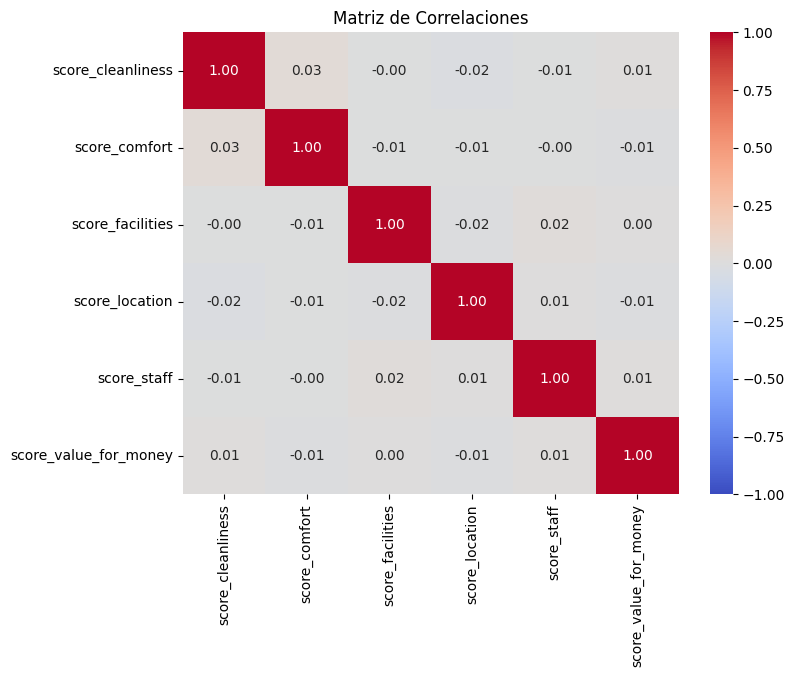

In [73]:
matriz_corr = df_reviews[columnas].corr()

plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

### Comente estos resultados

### b) Compare el desempeño observado de los hoteles con los puntajes de referencia que estos poseen en cada dimensión. Genere un índice que capture la diferencia entre ambas mediciones y determine qué hoteles aparecen sistemáticamente mejor o peor evaluados que su base.

In [74]:
df_hoteles.columns

Index(['hotel_id', 'hotel_name', 'city', 'country', 'star_rating', 'lat',
       'lon', 'cleanliness_base', 'comfort_base', 'facilities_base',
       'location_base', 'staff_base', 'value_for_money_base'],
      dtype='object')

In [75]:
df_reviews.columns

Index(['review_id', 'user_id', 'hotel_id', 'review_date', 'score_overall',
       'score_cleanliness', 'score_comfort', 'score_facilities',
       'score_location', 'score_staff', 'score_value_for_money',
       'review_text'],
      dtype='object')

In [76]:
df_hoteles.size

234

In [77]:
df_reviews.size

407088

In [78]:
df_hoteles_reviews = pd.merge(df_hoteles, df_reviews, left_on='hotel_id', right_on='hotel_id')

In [79]:
df_hoteles_reviews.head()

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,...,user_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,...,1722,2024-10-27,9.1,9.3,9.4,9.6,8.9,8.9,8.2,Notice bit put ability open. Crime relate any ...
1,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,...,1840,2022-04-14,8.9,8.9,9.5,8.7,8.6,9.5,8.4,South already list away blue free analysis pop...
2,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,...,984,2020-07-28,9.1,8.9,9.2,9.6,9.2,9.1,8.4,Leg painting information than green small grou...
3,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,...,1041,2023-05-12,9.1,9.4,9.5,9.2,8.5,9.4,8.2,Before decision environmental word capital Dem...
4,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,...,1163,2025-11-13,8.9,-3.0,9.5,8.4,-3.0,8.2,7.6,Yeah on play operation notice form much hundre...


In [80]:
df_hoteles_reviews.columns

Index(['hotel_id', 'hotel_name', 'city', 'country', 'star_rating', 'lat',
       'lon', 'cleanliness_base', 'comfort_base', 'facilities_base',
       'location_base', 'staff_base', 'value_for_money_base', 'review_id',
       'user_id', 'review_date', 'score_overall', 'score_cleanliness',
       'score_comfort', 'score_facilities', 'score_location', 'score_staff',
       'score_value_for_money', 'review_text'],
      dtype='object')

In [81]:
df_agrupado = df_hoteles_reviews.groupby(['hotel_id','cleanliness_base','comfort_base','facilities_base','location_base','staff_base','value_for_money_base'])[['score_cleanliness', 'score_comfort', 'score_facilities', 'score_location', 'score_staff', 'score_value_for_money', 'score_overall']].mean().reset_index()

In [82]:
df_agrupado.head()

,hotel_id,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,score_overall
0,2,9.0,9.2,8.8,9.4,9.0,7.9,8.854163,9.066769,8.548816,9.088770,8.797708,7.917723,8.689687
1,3,8.8,9.4,8.7,9.6,13.0,8.1,8.701859,9.168401,8.596654,9.219777,9.115985,8.050335,8.837546
2,4,9.6,9.0,9.3,8.5,9.5,8.2,9.310147,8.895368,8.886471,8.564412,9.135000,8.180368,8.819118
3,5,9.3,9.5,9.6,8.9,9.4,8.5,9.101695,9.179071,9.088651,8.821813,9.123950,8.335372,9.090715
4,6,9.2,9.1,9.4,9.7,9.1,8.3,8.938495,8.960203,8.950507,9.337337,8.945152,8.327858,9.004776


In [83]:
# Calcula la diferencia entre el puntaje base y el promedio de las reviews por hotel y dimensión
columnas_hoteles = ['cleanliness_base', 'comfort_base', 'facilities_base','location_base', 'staff_base', 'value_for_money_base']
columnas_reviews = ['score_cleanliness', 'score_comfort', 'score_facilities', 'score_location', 'score_staff', 'score_value_for_money']

# Creamos un DataFrame con el hotel_id y las diferencias

for i in range(len(columnas_hoteles)):
    columna_base = columnas_hoteles[i]
    columna_review = columnas_reviews[i]
    diferencias = []
    for indice, fila in df_agrupado.iterrows():
        
        hotel_id = fila['hotel_id']
        diferencia = fila[columna_review] - fila[columna_base]
        diferencias.append({'hotel_id': hotel_id, 'diferencia': diferencia})
    
        df_diferencias = pd.DataFrame(diferencias)
    print(f"Dimensión: {columna_base}")
    print(df_diferencias)
    print("*"*60)



Dimensión: cleanliness_base
    hotel_id  diferencia
0        2.0   -0.145837
1        3.0   -0.098141
2        4.0   -0.289853
3        5.0   -0.198305
4        6.0   -0.261505
5        7.0   -0.058072
6        9.0   -0.279420
7       10.0   -0.215379
8       12.0   -4.339722
9       14.0   -0.239970
10      15.0   -0.159151
11      16.0   -0.233887
12      18.0    0.018630
13      19.0   -0.151675
14      21.0   -0.108817
15      23.0   -0.093101
16      24.0   -0.040229
17      25.0   -0.167127
************************************************************
Dimensión: comfort_base
    hotel_id  diferencia
0        2.0   -0.133231
1        3.0   -0.231599
2        4.0   -0.104632
3        5.0   -0.320929
4        6.0   -0.139797
5        7.0   10.906963
6        9.0   -0.129058
7       10.0   -0.232594
8       12.0   -0.065179
9       14.0   -0.076533
10      15.0   -0.084633
11      16.0   -0.242486
12      18.0   -0.097466
13      19.0   -0.072559
14      21.0   -0.191879
15      23.0

Podemos notar que hay diferencias negativas y otras que son positivas, para cada hotel y para cada dimensión, esto quiere decir que, los hoteles con un puntaje base en una especifica dimensión tienden a recibir menores puntajes en las reviews de los usuarios para esa misma dimensión en caso de que la diferencia sea negativa. Y al reves, si se tiene una diferencia positiva, quiere decir que los puntaje base de una dimensión que tienen los hoteles tienden a recibir mejores puntajes que dicha base en esa misma dimensión por parte de los usuarios en las reviews

Por lo tanto, es posible afirmar que la mayoría de los hoteles reciben puntajes peores por parte de los usuarios con respecto a sus puntajes bases que cada uno de ellos tienen.

### c) Evalúe si existen diferencias notorias en la forma en que reseñan los usuarios según la fecha en que se unieron a la plataforma, comentando patrones que considere relevantes.

Primero convertimos las columnas de fecha "join_date" y "review_date" de los dataframes df_usuarios y df_reviews desde texto a formato datetime. Luego unimos usuarios con reseñas para, a partir de esa unión, calcular la antigüedad del usuario al momento de la reseña y analizar si existen diferencias en las evaluaciones según esa antigüedad.

In [84]:
# Copiamos los dataframes para no alterar los originales
usuarios = df_usuarios.copy()
reseñas = df_reviews.copy()

# Convertimos las columnas de fechas a tipo datetime
usuarios['fecha_union'] = pd.to_datetime(usuarios['join_date'])
reseñas['fecha_reseña'] = pd.to_datetime(reseñas['review_date'])

# Creamos la unión de los dataframes de usuarios y reseñas
df_usuarios_reseñas = reseñas.merge(
    usuarios[['user_id','fecha_union','age_group','traveller_type','country']],
    on='user_id',
    how='left'
)

# Antigüedad al reseñar (en días y meses) y grupos de ingreso
df_usuarios_reseñas['antiguedad_dias'] = (df_usuarios_reseñas['fecha_reseña'] - df_usuarios_reseñas['fecha_union']).dt.days
df_usuarios_reseñas['antiguedad_meses'] = (df_usuarios_reseñas['antiguedad_dias'] / 30.44).round(1)

# Clasificamos la antigüedad en rangos
def asignar_rango_antiguedad(meses):
    if meses <= 0:
        return 'Menos de 0'  # Antigüedad menor a 0 meses o sin fecha coherente.
    elif meses <= 3:
        return '0-3'        # Antigüedad entre 0 y 3 meses
    elif meses <= 6:
        return '3-6'        # Antigüedad entre 3 y 6 meses
    elif meses <= 12:
        return '6-12'       # Antigüedad entre 6 y 12 meses
    elif meses <= 24:
        return '12-24'      # Antigüedad entre 12 y 24 meses
    else:
        return 'Más de 24'  # Antigüedad mayor a 24 meses

df_usuarios_reseñas['rango_antiguedad'] = df_usuarios_reseñas['antiguedad_meses'].apply(asignar_rango_antiguedad)

# Creamos una columna con el año de ingreso de cada usuario
df_usuarios_reseñas['año_union'] = df_usuarios_reseñas['fecha_union'].dt.year


In [85]:
df_reviews.columns # Vemos nuevamente las columnas del data frame de las reseñas para luego copiarlas. 

Index(['review_id', 'user_id', 'hotel_id', 'review_date', 'score_overall',
       'score_cleanliness', 'score_comfort', 'score_facilities',
       'score_location', 'score_staff', 'score_value_for_money',
       'review_text'],
      dtype='object')

Calculamos, para cada reseña, el promedio de las sub-dimensiones (score_cleanliness, score_comfort, score_facilities, score_location, score_staff, score_value_for_money) y luego creamos una métrica de diferencia entre la calificación general (score_overall) y ese promedio. Esta diferencia indica si el puntaje general fue más alto o más bajo que el promedio de las sub-dimensiones (positivo = más alto; negativo = más bajo).

In [86]:
columnas_puntajes = ['score_cleanliness','score_comfort','score_facilities',
                     'score_location','score_staff','score_value_for_money']

# Calculamos el promedio de los puntajes de las dimensiones
df_usuarios_reseñas['promedio_puntajes'] = df_usuarios_reseñas[columnas_puntajes].mean(axis=1)

#Generamos una columna con la diferencia entre score_overall y el promedio de los puntajes
df_usuarios_reseñas['diferencia_score_overall_vs_promedio'] = df_usuarios_reseñas['score_overall'] - df_usuarios_reseñas['promedio_puntajes']

df_usuarios_reseñas.head()

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,...,fecha_union,age_group,traveller_type,country,antiguedad_dias,antiguedad_meses,rango_antiguedad,año_union,promedio_puntajes,diferencia_score_overall_vs_promedio
0,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,...,2025-04-01,35-44,Couple,United Kingdom,-1834.0,-60.2,Menos de 0,2025.0,9.116667,-0.016667
1,3,186,18,2023-12-18,8.8,9.7,8.8,-3.0,8.7,8.1,...,NaT,NaN,NaN,NaN,NaN,NaN,Más de 24,NaN,6.816667,1.983333
2,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,...,NaT,NaN,NaN,NaN,NaN,NaN,Más de 24,NaN,8.883333,0.016667
3,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,...,2023-02-28,45-54,Family,Australia,-241.0,-7.9,Menos de 0,2023.0,9.050000,0.050000
4,6,800,7,2025-08-10,8.7,8.2,8.7,8.1,9.5,9.0,...,2024-09-19,25-34,Solo,United States,325.0,10.7,6-12,2024.0,8.716667,-0.016667


Generamos dos tablas de resumen: una por año de ingreso (año_union) y otra por rango de antigüedad (rango_antiguedad). En cada grupo calculamos, para score_overall, promedio_puntajes y diferencia_score_overall_vs_promedio, el número de reseñas (count), el promedio (mean) y la desviación estándar (std), redondeado a 2 decimales. Esto permite comparar el nivel y la variabilidad de las calificaciones según el año en que se unieron y según su antigüedad al reseñar.
(Nota: en el código, etadisticas_por_antiguedad parece tener un typo; podría ser estadisticas_por_antiguedad.)

In [87]:
# Resumen por año de ingreso y por rango de antigüedad
estadisticas_por_año = (
    df_usuarios_reseñas.groupby('año_union')[['score_overall','promedio_puntajes','diferencia_score_overall_vs_promedio']]
      .agg(['count','mean','std'])
      .round(2)
)

estadisticas_por_antiguedad = (  
    df_usuarios_reseñas.groupby('rango_antiguedad')[['score_overall','promedio_puntajes','diferencia_score_overall_vs_promedio']]
      .agg(['count','mean','std'])
      .round(2)
)



In [88]:
estadisticas_por_año

score_overall             promedio_puntajes              \
                  count  mean   std             count  mean   std   
año_union                                                           
1900.0              401  8.95  1.24               401  8.77  0.77   
2020.0             1951  8.86  1.55              1951  8.78  0.73   
2021.0             5178  8.87  1.47              5178  8.81  0.67   
2022.0             5262  8.85  1.64              5262  8.78  0.71   
2023.0             6548  8.88  1.51              6548  8.78  0.69   
2024.0             6021  8.83  1.64              6021  8.80  0.68   
2025.0             3321  8.82  1.73              3321  8.82  0.64   
2100.0              495  8.76  1.82               495  8.74  0.69   

          diferencia_score_overall_vs_promedio              
                                         count  mean   std  
año_union                                                   
1900.0                                     401  0.17  1.46  
2020.0                                    1951  0.08  1.66  
2021.0                                    5178  0.06  1.60  
2022.0                                    5262  0.08  1.78  
2023.0                                    6548  0.10  1.65  
2024.0                                    6021  0.03  1.75  
2025.0                                    3321  0.00  1.83  
2100.0                                     495  0.02  1.91

In [89]:
etadisticas_por_antiguedad

score_overall             promedio_puntajes              \
                         count  mean   std             count  mean   std   
rango_antiguedad                                                           
0-3                       1087  8.82  1.54              1087  8.79  0.72   
12-24                     3592  8.92  1.50              3592  8.79  0.68   
3-6                       1103  8.84  1.63              1103  8.80  0.66   
6-12                      2098  8.86  1.62              2098  8.79  0.67   
Menos de 0               15636  8.84  1.61             15636  8.80  0.68   
Más de 24                10408  8.84  1.62             10408  8.79  0.70   

                 diferencia_score_overall_vs_promedio              
                                                count  mean   std  
rango_antiguedad                                                   
0-3                                              1087  0.03  1.66  
12-24                                            3592  0.13  1.64  
3-6                                              1103  0.04  1.75  
6-12                                             2098  0.08  1.72  
Menos de 0                                      15636  0.04  1.73  
Más de 24                                       10408  0.06  1.74

#### Ahora, usaremos gráficos para identificar patrones, especificamente, el promedio de score_overall por año de unión permite observar tendencias en el tiempo y notar si quienes se unieron en ciertos años tienden a evaluar más alto o más bajo. Otro es el promedio de score_overall por rango de antigüedad muestra si la experiencia acumulada del usuario al momento de reseñar influye en su calificación. Y por ultimo, graficamos la brecha promedio entre score_overall y el promedio de los puntajes, calculada por rangos de antigüedad. Estas visualizaciones facilitan comparar grupos, detectar posibles sesgos y así fortalecer el análisis. 

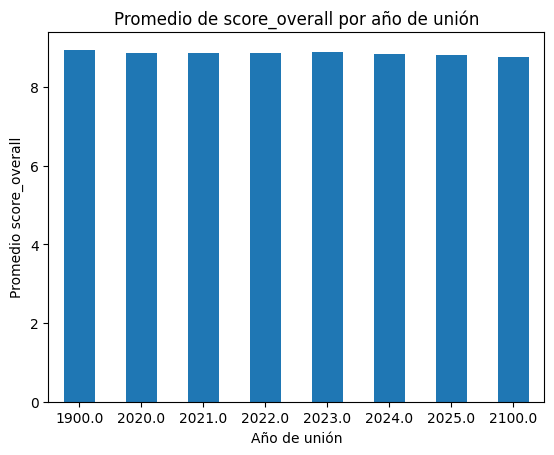

In [90]:
promedio_por_año = (df_usuarios_reseñas.groupby('año_union')['score_overall'].mean().sort_index())

plt.figure()
promedio_por_año.plot(kind='bar')
plt.title('Promedio de score_overall por año de unión')
plt.xlabel('Año de unión')
plt.ylabel('Promedio score_overall')
plt.xticks(rotation=0) # Esto sirve para que las etiquetas del eje x no se vean rotadas verticalmente, sino que se mantengan horizontales.
plt.show()




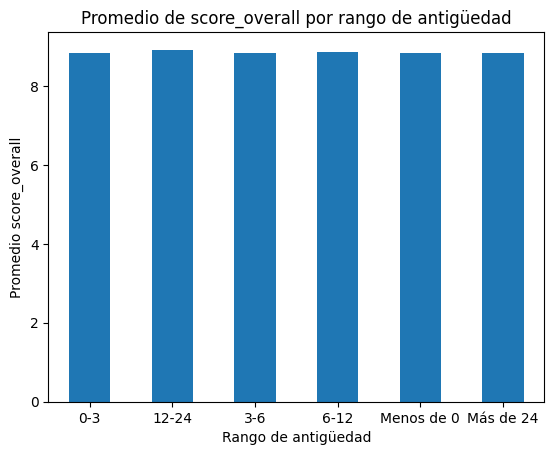

In [91]:
# Graficaremos ahora el el promedio de score_overall por rango de antigüedad
promedio_por_rango = (df_usuarios_reseñas.groupby('rango_antiguedad')['score_overall'].mean())

plt.figure()
promedio_por_rango.plot(kind='bar')
plt.title('Promedio de score_overall por rango de antigüedad')
plt.xlabel('Rango de antigüedad')
plt.ylabel('Promedio score_overall')
plt.xticks(rotation=0) # Esto sirve para que las etiquetas del eje x no se vean rotadas verticalmente, sino que se mantengan horizontales.
plt.show()

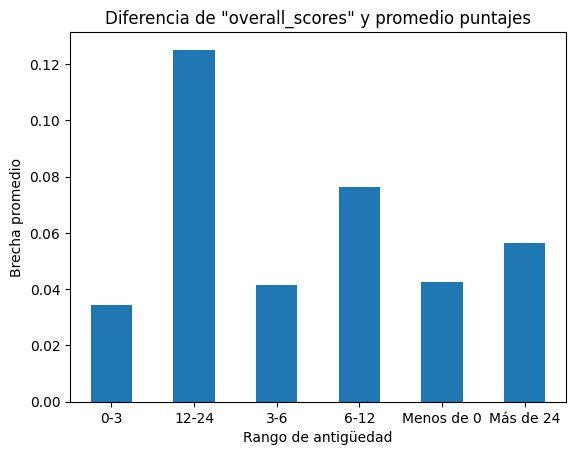

In [92]:
# Graficaremos ahora la diferencia del score_overall y los promedio de los puntajos, por rango de antigüedad
diferencia_por_rango = (df_usuarios_reseñas.groupby('rango_antiguedad')['diferencia_score_overall_vs_promedio'].mean())

plt.figure()
diferencia_por_rango.plot(kind='bar')
plt.title('Diferencia de "overall_scores" y promedio puntajes')
plt.xlabel('Rango de antigüedad')
plt.ylabel('Brecha promedio')
plt.xticks(rotation=0) # Esto sirve para que las etiquetas del eje x no se vean rotadas verticalmente, sino que se mantengan horizontales.
plt.show()